# WeRateDogs Twitter Analysis
Wrangle and Analyze Data Project Submission  
Data Analyst Nanodegree Program  
Jessica Ertel  

### Table of Contents
- [Data Gathering](#Data-Gathering)
- [Data Assessing](#Data-Assessing)
- [Data Cleaning: Tidiness](#Data-Cleaning:-Tidiness)
- [Data Cleaning: Quality](#Data-Cleaning:-Quality)
- [Analyze and Visualize](#Analyze-and-Visualize)

In [1]:
# data gathering 
import config
import os
import requests
import time
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# standard data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser

## Data Gathering
There are three elements of data gathering involved in this section. The WeRateDogs Twitter archive was provided by Udacity and downloaded manually. Using the tweet IDs from the WeRateDogs Twitter archive, I query the Twitter API for each tweet's JSON data and write the data to a text file. Finally, tweet image predictions according to a neural network are downloaded programmatically from Udacity's servers using the Requests library.

In [58]:
# import WeRateDogs twitter archive (provided by Udacity)
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = config.CONSUMER_KEY
consumer_secret = config.CONSUMER_SECRET
access_token = config.ACCESS_TOKEN
access_secret = config.ACCESS_SECRET

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Gather IDs from WeRateDogs twitter archive
tweet_ids = archive.tweet_id.values


# Query Twitter's API for JSON data for each tweet ID
# Save each tweet's returned JSON as a new line in a .txt file
fails_dict = {}

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print(f"Tweet ID: {tweet_id} no longer exists.") 
            fails_dict[tweet_id] = e
            pass

print(fails_dict)

Tweet ID: 888202515573088257 no longer exists.
Tweet ID: 873697596434513921 no longer exists.
Tweet ID: 872668790621863937 no longer exists.
Tweet ID: 872261713294495745 no longer exists.
Tweet ID: 869988702071779329 no longer exists.
Tweet ID: 866816280283807744 no longer exists.
Tweet ID: 861769973181624320 no longer exists.
Tweet ID: 856602993587888130 no longer exists.
Tweet ID: 851953902622658560 no longer exists.
Tweet ID: 845459076796616705 no longer exists.
Tweet ID: 844704788403113984 no longer exists.
Tweet ID: 842892208864923648 no longer exists.
Tweet ID: 837366284874571778 no longer exists.
Tweet ID: 837012587749474308 no longer exists.
Tweet ID: 829374341691346946 no longer exists.
Tweet ID: 827228250799742977 no longer exists.
Tweet ID: 812747805718642688 no longer exists.
Tweet ID: 802247111496568832 no longer exists.
Tweet ID: 779123168116150273 no longer exists.
Tweet ID: 775096608509886464 no longer exists.
Tweet ID: 771004394259247104 no longer exists.
Tweet ID: 770

In [16]:
# Load in json data line by line and turn into pandas df
data = []
with open('tweet-json.txt') as json_file:
    for row in json_file:
        json_data = json.loads(row)
        data.append({"tweet_id":json_data["id"],
                   "favorites":json_data["favorite_count"],
                   "retweets":json_data["retweet_count"],
                   "timestamp":json_data["created_at"]})

tweets = pd.DataFrame(data, columns=['tweet_id',
                                     'favorites',
                                     'retweets',
                                     'timestamp'])

In [17]:
tweets.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


In [7]:
# Save to csv
tweets.to_csv('twitter_scrape.csv', index=False)

In [59]:
# download image predictions programmatically (provided by Udacity)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
preds = requests.get(url,auth=('user', 'pass'))

with open('image_predictions.tsv', 'wb') as file:
    file.write(preds.content)

image_preds = pd.read_csv('image_predictions.tsv', sep='\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Data Assessing
After gathering the data, I assess them visually and programmatically for quality and tidiness issues. The visual assessment requires printing out the rows of each dataset and assessing the values of these rows. The programmatic assessment ensures that the datasets are correct and they have a proper structure.

While there are many areas that can be cleaned, this assignment requires that I detect and document eight quality issues and two tidiness issues.

### Visual Assessment

In [60]:
image_preds[:50]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [61]:
tweets = pd.read_csv('twitter_scrape.csv')
tweets[:50]

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,20562,3261,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,12041,2158,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,56848,16716,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,28226,4429,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,32467,7711,Wed Jul 26 15:59:51 +0000 2017


In [62]:
archive[:50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Programmatic Assessment

In [63]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   int64 
 1   favorites  2354 non-null   int64 
 2   retweets   2354 non-null   int64 
 3   timestamp  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [65]:
tweets.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [66]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Cleaning Tasks
Following the assessment, these issues were identified:

**Data Tidiness Issues**  
1. Merge the three data sets since they are part of the same observational unit.
2. Merge the four dog stage columns into a single column and rename.


**Data Quality Issues**  
3. Remove retweets, since retweets are essentially duplicates of the original tweets. 
4. Remove replies, since they are not original tweets.
5. Change data type for `tweet_id` column to a string.
6. Change the data type for `timestamp` columns to datetime object, then confirm they are the same and drop the duplicate.
7. Change inaccurate dog names to 'None'.
8. Update the scores that were incorrectly identified from the text column.
9. Make all the image prediction strings in columns `p1`, `p2` and `p3` lowercase.
10. Update column names to make them more intuitive.

## Data Cleaning: Tidiness

In [67]:
image_preds.shape, archive.shape, tweets.shape

((2075, 12), (2356, 17), (2354, 4))

### 1. Merge three data sets

In [68]:
# merge new tweets with the archive dataset
full = pd.merge(pd.merge(image_preds, tweets, on='tweet_id'), archive, on='tweet_id')

# save to csv
full.to_csv('twitter_archive_master.csv', index=False)

In [69]:
full = pd.read_csv('twitter_archive_master.csv')
full.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [70]:
# Check shape
full.shape

(2073, 31)

### 2. Merge four dog stages into single column

In [71]:
# Can a dog identify in multiple stages?
full[(full['doggo']=='doggo')&(full['floofer']=='floofer')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1912,854010172552949760,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,...,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [72]:
# Iterate through dog stages and combine into one column
full['stage'] = full[['doggo', 'floofer', 'pupper', 'puppo']] \
.apply(lambda x: ','.join(x).replace('None,', '').replace(',None', ''), axis=1)

In [73]:
# Confirm value counts
full['stage'].value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [74]:
# Drop original dog stage columns
full.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [75]:
# Check - should have 28 columns
full.shape

(2073, 28)

## Data Cleaning: Quality

### 3. Remove retweets

In [76]:
# Check how many rows are retweets
full['retweeted_status_id'].notnull().sum()

79

In [77]:
# Drop rows that are retweets
full = full[full['retweeted_status_id'].isnull()]

full.shape

(1994, 28)

### 4. Remove replies

In [78]:
# Check how many rows are replies
full['in_reply_to_status_id'].notnull().sum()

23

In [79]:
# Drop rows that are replies
full = full[full['in_reply_to_status_id'].isnull()]

full.shape

(1971, 28)

In [80]:
# Check percentage of null values per column
full.isnull().sum() / len(full) * 100

tweet_id                        0.0
jpg_url                         0.0
img_num                         0.0
p1                              0.0
p1_conf                         0.0
p1_dog                          0.0
p2                              0.0
p2_conf                         0.0
p2_dog                          0.0
p3                              0.0
p3_conf                         0.0
p3_dog                          0.0
favorites                       0.0
retweets                        0.0
timestamp_x                     0.0
in_reply_to_status_id         100.0
in_reply_to_user_id           100.0
timestamp_y                     0.0
source                          0.0
text                            0.0
retweeted_status_id           100.0
retweeted_status_user_id      100.0
retweeted_status_timestamp    100.0
expanded_urls                   0.0
rating_numerator                0.0
rating_denominator              0.0
name                            0.0
stage                       

In [81]:
# Drop retweet and reply columns
full.drop(columns=['in_reply_to_status_id', 
                   'in_reply_to_user_id', 
                   'retweeted_status_id', 
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp',
                   'expanded_urls', 
                   'source'], inplace=True)

In [82]:
# Confirm 
full.shape

(1971, 21)

### 5. Change `tweet_id` data type to a string

In [83]:
full['tweet_id'] = full['tweet_id'].astype('str')

# Confirm change
full['tweet_id'].dtype

dtype('O')

### 6. Change `timestamp` columns to datetime data type

In [84]:
# remove day of the week
full['timestamp_x'] = full['timestamp_x'].str.slice(4, )

In [85]:
# Change timestamp_x and y to datetime format
# illustrate two options for approaching this
full['timestamp_x'] = [datetime.strptime(row, '%b %d %H:%M:%S %z %Y') for row in full['timestamp_x']]
full['timestamp_y'] = [parser.parse(row) for row in full['timestamp_y']]

# Confirm change
full.dtypes

tweet_id                               object
jpg_url                                object
img_num                                 int64
p1                                     object
p1_conf                               float64
p1_dog                                   bool
p2                                     object
p2_conf                               float64
p2_dog                                   bool
p3                                     object
p3_conf                               float64
p3_dog                                   bool
favorites                               int64
retweets                                int64
timestamp_x               datetime64[ns, UTC]
timestamp_y           datetime64[ns, tzutc()]
text                                   object
rating_numerator                        int64
rating_denominator                      int64
name                                   object
stage                                  object
dtype: object

In [86]:
# Confirm timestamps match
(full['timestamp_x'] == full['timestamp_y']).value_counts()

True    1971
dtype: int64

In [87]:
# Drop duplicate column
full.drop(columns=['timestamp_y'], inplace=True)

### 7. Change innaccurate dog names to 'None'

In [88]:
# Check for unlikely dog names
full[full['name'].str.islower()]['name'].value_counts()

a               55
the              7
an               6
very             4
one              4
quite            3
just             3
getting          2
by               1
his              1
light            1
incredibly       1
space            1
my               1
this             1
actually         1
such             1
all              1
unacceptable     1
infuriating      1
not              1
officially       1
Name: name, dtype: int64

In [89]:
# Replace unlikely dog names with 'None'
full['name'].replace(['a',
                      'the',
                      'an',
                      'one',
                      'very',
                      'quite',
                      'just', 
                      'getting',
                      'unacceptable',
                      'all',
                      'space',
                      'officially',
                      'light',
                      'by',
                      'this',
                      'infuriating',
                      'such',
                      'my',
                      'his',
                     'actually',
                     'not',
                     'incredibly'], 'None', inplace=True)

In [90]:
# Confirm replace worked correctly
full[full['name'].str.islower()]['name'].value_counts()

Series([], Name: name, dtype: int64)

### 8. Update incorrect ratings

In [91]:
# Check for denominators above 10
full[(full['rating_denominator'] > 10)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,timestamp_x,text,rating_numerator,rating_denominator,name,stage
501,675853064436391936,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True,2927,1460,2015-12-13 01:41:41+00:00,Here we have an entire platoon of puppers. Tot...,88,80,None,None
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True,3323,1104,2015-12-18 05:06:23+00:00,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,None,None
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,26239,15043,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is i...,7,11,Darrel,None
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False,4225,1563,2016-01-05 04:00:18+00:00,Someone help the girl is being mugged. Several...,121,110,None,None
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True,3748,1552,2016-02-10 16:51:59+00:00,Happy Wednesday here's a bucket of pups. 44/40...,44,40,None,None
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,3201,1028,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll ...,60,50,None,None
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,2634,721,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro...",45,50,None,None
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2529,636,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very pre...,80,80,None,None
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,3062,829,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2574,247,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None


In [92]:
# Analyze full text column for errors
with pd.option_context('display.max_colwidth', -1): 
    display(full[(full['rating_denominator'] > 10)]['text'])

501     Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                       
560     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                            
667     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5       
692     Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55      
865     Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                                                      
941     Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                
1007    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Ti

In [93]:
# create a function to easily update scores for specific records
def update_ranking(row, numerator, denominator):
    full.loc[row, 'rating_numerator'] = numerator
    full.loc[row, 'rating_denominator'] = denominator
    return full.loc[[row], ['rating_numerator', 'rating_denominator']]

In [94]:
# row 1066 rating should be 14/10
update_ranking(1066, 14, 10)

,rating_numerator,rating_denominator
1066,14,10


In [95]:
# row 1163 rating should be 13/10
update_ranking(1163, 13, 10)

,rating_numerator,rating_denominator
1163,13,10


In [96]:
# row 1200 rating should be 11/10
update_ranking(1200, 11, 10)

,rating_numerator,rating_denominator
1200,11,10


In [97]:
# row 1660 rating should be 10/10
update_ranking(1660, 10, 10)

,rating_numerator,rating_denominator
1660,10,10


### 9. Make all image predictions strings lowercase

In [98]:
full['p1'] = [row.lower() for row in full['p1']]
full['p2'] = [row.lower() for row in full['p2']]
full['p3'] = [row.lower() for row in full['p3']]

In [99]:
# Confirm change
full[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


### 10. Update column names

In [100]:
# Change the column names to make them more interpretable
full.rename(columns= {'p1': 'pred_1',
                      'p2': 'pred_2',
                      'p3': 'pred_3',}, inplace=True)

In [101]:
# Confirm change
full[['pred_1','pred_2','pred_3']]

,pred_1,pred_2,pred_3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2068,basset,english_springer,german_short-haired_pointer
2069,paper_towel,labrador_retriever,spatula
2070,chihuahua,malamute,kelpie
2071,chihuahua,pekinese,papillon


## Analyze and Visualize
I analyze and visualize the wrangled data, then conclude by sharing some insights.

### Plot Top Categories of Predictions

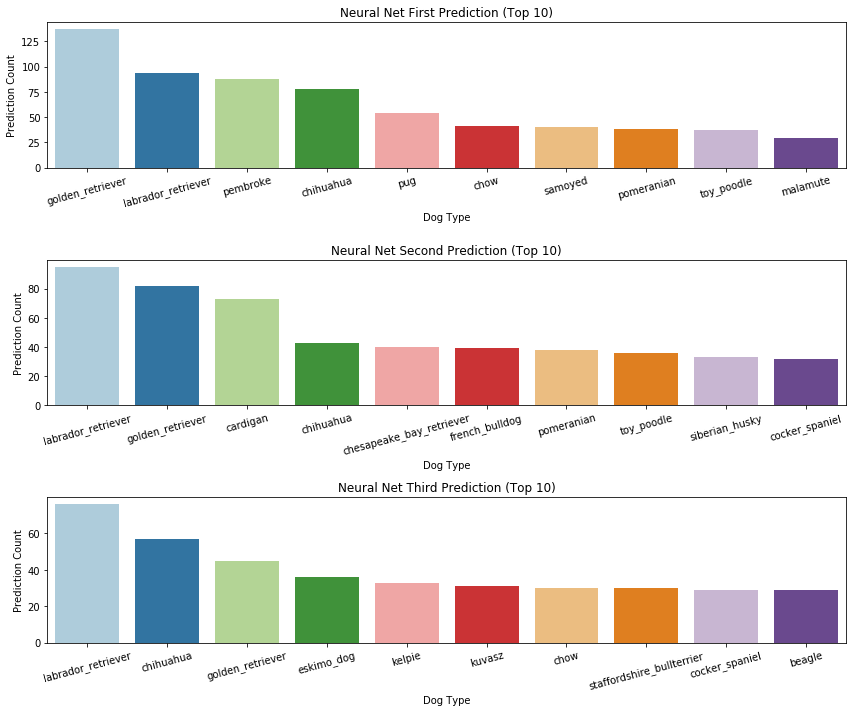

In [102]:
plt.figure(figsize=(12,10)) 

# First predictions
plt.subplot(3,1,1)
top_10 = sns.countplot(x='pred_1', 
                       data=full, 
                       palette="Paired", 
                       order=full['pred_1'].value_counts().iloc[:10].index)

top_10.set_xlabel('Dog Type')
top_10.set_ylabel('Prediction Count')
top_10.set_title('Neural Net First Prediction (Top 10)')
top_10.set_xticklabels(labels=top_10.get_xticklabels(), rotation=15)

# Second predictions
plt.subplot(3,1,2)
top_10 = sns.countplot(x='pred_2', 
                       data=full, 
                       palette="Paired", 
                       order=full['pred_2'].value_counts().iloc[:10].index)

top_10.set_xlabel('Dog Type')
top_10.set_ylabel('Prediction Count')
top_10.set_title('Neural Net Second Prediction (Top 10)')
top_10.set_xticklabels(labels=top_10.get_xticklabels(), rotation=15)


# Third predictions
plt.subplot(3,1,3)
top_10 = sns.countplot(x='pred_3', 
                       data=full, 
                       palette="Paired", 
                       order=full['pred_3'].value_counts().iloc[:10].index)

top_10.set_xlabel('Dog Type')
top_10.set_ylabel('Prediction Count')
top_10.set_title('Neural Net Third Prediction (Top 10)')
top_10.set_xticklabels(labels=top_10.get_xticklabels(), rotation=15)
plt.tight_layout(); 

### Identify Timestamp Trends

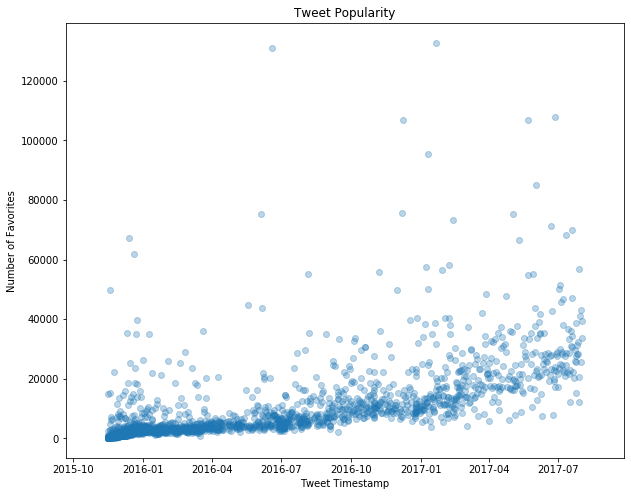

In [103]:
plt.figure(figsize=(10,8)) 

plt.scatter(x=full['timestamp_x'], 
            y=full['favorites'],
            alpha=.3)

plt.xlabel('Tweet Timestamp')
plt.ylabel('Number of Favorites')
plt.title('Tweet Popularity');

### Insights

- The two most common categories of dogs predicted by the neural net were golden retrievers and labrador retrievers. The chart doesn't illustrate the confidence level in each prediction, but we can expect that these breeds are likely the most popular on the WeRateDogs account.
- The Chihuahua is also a popular breed predicted by the neural net. Maybe the dogs with a higher number of predictions have very specific features and therefore, are easier for the neural net to identify.
- Tweets on the WeRateDogs account are increasing in popularity over time. In 2017, tweets appear to be getting a higher average number of favorites compared to the beginning of 2016 and there are fewer tweets with 0 favorites.